# 1. Importación de librerías

In [2]:
#Librerías a utilizar

import pandas as pd
pd.set_option("display.max_columns", 50)

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import pickle

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.base import clone

#2. Importación del Dataset

In [3]:
# Descargar la data
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00603/in-vehicle-coupon-recommendation.csv
#!ls -l
#dataset = pd.read_csv('/content/in-vehicle-coupon-recommendation.csv')
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00603/in-vehicle-coupon-recommendation.csv')

#3. Revisión del Dataset

In [4]:
#Visualizar la cabecera
dataset.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [5]:
#Visualizar datos generales
print("**************************************************")
print("Dimensiones")
print("**************************************************")
print(dataset.shape)
print("\n")
print("**************************************************")
print("Detalle de Columnas")
print("**************************************************")
print(dataset.info())
print("\n")
print("**************************************************")
print("Detalle del target")
print("**************************************************")
print(dataset.Y.value_counts())
print(dataset.Y.value_counts()/len(dataset))

**************************************************
Dimensiones
**************************************************
(12684, 26)


**************************************************
Detalle de Columnas
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null

In [14]:
#Deficiencias del dataset: Nulos
print("**************************************************")
print("Detalle de Nulos")
print("**************************************************")
print(dataset.isnull().sum())
print("\n")
#Análisis de nulos
print("**************************************************")
print("Análisis de Nulos")
print("**************************************************")
nulos = dataset.isna().sum()/len(dataset)*100
nulos[nulos>0].sort_values(ascending = False)

**************************************************
Detalle de Nulos
**************************************************
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


**************************************************
Análisis de Nulos
*****************

car                     99.148534
CoffeeHouse              1.710817
Restaurant20To50         1.490066
CarryAway                1.190476
RestaurantLessThan20     1.024913
Bar                      0.843582
dtype: float64

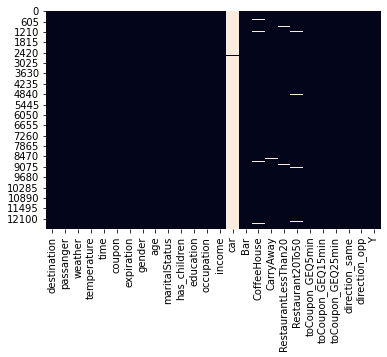

In [17]:
#Visualización de nulos
sns.heatmap(dataset.isnull(),cbar=False)

In [18]:
#Deficiencias del dataset: Campos índice (cantidad=cercano al universo) o que no aportan información (cantidad = 1)
print("**************************************************")
print("Detalle de posibles campos índice o que no aportan información")
print("**************************************************")
print(dataset.nunique())
print("\n")
#Análisis de campos que no aportan información
print("**************************************************")
print("Análisis de campos que no aportan información")
print("**************************************************")
dataset.nunique()==1

**************************************************
Detalle de posibles campos índice o que no aportan información
**************************************************
destination              3
passanger                4
weather                  3
temperature              3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
car                      5
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
direction_opp            2
Y                        2
dtype: int64


**************************************************
Análisis de campos que no aportan información
*********************

destination             False
passanger               False
weather                 False
temperature             False
time                    False
coupon                  False
expiration              False
gender                  False
age                     False
maritalStatus           False
has_children            False
education               False
occupation              False
income                  False
car                     False
Bar                     False
CoffeeHouse             False
CarryAway               False
RestaurantLessThan20    False
Restaurant20To50        False
toCoupon_GEQ5min         True
toCoupon_GEQ15min       False
toCoupon_GEQ25min       False
direction_same          False
direction_opp           False
Y                       False
dtype: bool

#4. Depuración del Dataset

In [19]:
#Eliminación de campos con demasiada información nula (car)
dataset = dataset.drop('car', axis = 1)

In [20]:
#Eliminación de campos que no aportan información (toCoupon_GEQ5min)
dataset = dataset.drop('toCoupon_GEQ5min', axis = 1)

In [21]:
#Clasificación de campos categóricos y numéricos
numeric_columns = list()
categorical_columns = list()
dictionary_of_columns_with_index_to_categorical = dict()
dictionary_of_columns_with_categorical_to_index = dict()
dataset_new = dataset
for column in dataset_new:
  #Determinamos si la columna (variable) es numérica o no
  if pd.api.types.is_numeric_dtype(dataset[column]):
    numeric_columns.append(column)
  else:
    #Modificamos el tipo de dato de la columna (variable) mediante "astype"
    dataset_new[column] = dataset_new[column].astype("category")

    #Verificamos si el tipo de dato de la columna (variable) fue transformado a categórico correctamente
    if not pd.api.types.is_categorical_dtype(dataset[column]):
      raise Exception("La columna {} no se transformó correctamente a categórica".format(column))

    dictionary_of_columns_with_index_to_categorical[column] = dict()
    dictionary_of_columns_with_categorical_to_index[column] = dict()
    
    #Indexamos los valores (categorías), sin tomar en consideración los nulos, de la columna (variable) y guardamos esa información en los diccionarios
    for index, category in enumerate(dataset[column].cat.categories):
      dictionary_of_columns_with_index_to_categorical[column][index] = category
      dictionary_of_columns_with_categorical_to_index[column][category] = index
    
    categorical_columns.append(column)

In [24]:
#Campos numéricos y categóricos
print("**************************************************")
print("Campos numéricos")
print("**************************************************")
print(numeric_columns)
print("\n")
print("**************************************************")
print("Campos categóricos")
print("**************************************************")
print(categorical_columns)


**************************************************
Campos numéricos
**************************************************
['temperature', 'has_children', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y']


**************************************************
Campos categóricos
**************************************************
['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']


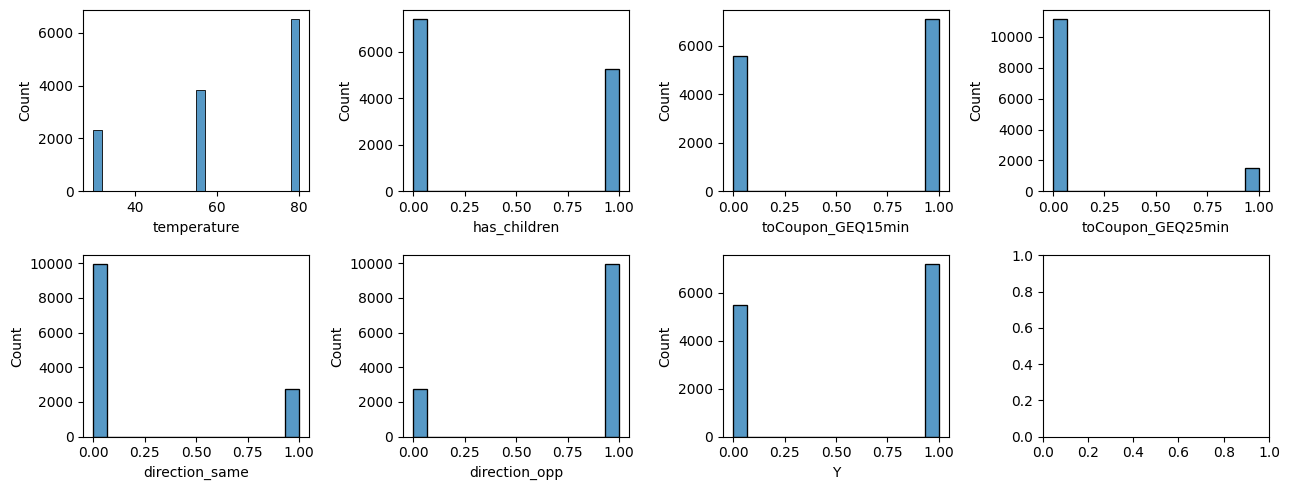

In [27]:
#Visualización de Campos Numéricos
width = 13
height = 5

plt.style.use("default")

figure, axes = plt.subplots(nrows=2, ncols=4, figsize=(width, height))

for column, axe in zip(dataset[numeric_columns], axes.flatten()):
    sns.histplot(dataset[column], ax=axe)
    
plt.tight_layout()

In [29]:
# Conversión one hot encoding (data)
data = pd.get_dummies(dataset)
data.head()

,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,time_10AM,time_10PM,time_2PM,time_6PM,time_7AM,coupon_Bar,coupon_Carry out & Take away,coupon_Coffee House,...,Bar_1~3,Bar_4~8,Bar_gt8,Bar_less1,Bar_never,CoffeeHouse_1~3,CoffeeHouse_4~8,CoffeeHouse_gt8,CoffeeHouse_less1,CoffeeHouse_never,CarryAway_1~3,CarryAway_4~8,CarryAway_gt8,CarryAway_less1,CarryAway_never,RestaurantLessThan20_1~3,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never
0,55,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,80,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,80,1,1,0,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,80,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,80,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


#### Descripción de las variables restantes:
- `destination` = Lugar de destino
- `passanger` = Pasajeros con quien va acompañado
- `weather` = Condición climática al conducir
- `temperature` = Temperatura al momento de conducir
- `time` = Hora en la que se le ofrece el cpón al conductor
- `coupon` = Tipo de cupón a canjear
- `expiration` = Caducidad del cupón en 1 día o 2 horas
- `gender` = Género (Masculino o Femenino)
- `age` = Edad
- `maritalStatus` = Estado Civil
- `has_children` = Tiene hijos
- `education` = Grado de Educación
- `occupation` = Ocupación u oficio
- `income` = Renta Anual
- `Bar` = ¿Cuántas veces va a un bar al mes?
- `CoffeeHouse` = ¿Cuántas veces va a una cafetería al mes?
- `CarryAway` = ¿Cuántas veces ordena comida para llevar al mes?
- `RestaurantLessThan20` = ¿Cuántas veces ha ido a un restaurante con un gasto promedio de 20 dólares por persona al mes? 
- `Restaurant20To50` = ¿Cuántas veces ha ido a un restaurante con un gasto promedio entre 20 y 50 dólares por persona al mes?
- `toCoupon_GEQ15min` = ¿Tarda más de 15 minutos en llegar al restaurante/bar para canjear el cupón?
- `toCoupon_GEQ25min` = ¿Tarda más de 25 minutos en llegar al restaurante/bar para canjear el cupón?
- `direction_same` = ¿El restaurante/bar está en la misma dirección que su destino actual?
- `direction_opp` = ¿El restaurante/bar está en diferente dirección a su destino actual? 
- `Y` = Acepta el cupón.

#5. Experimentación

In [ ]:
#data